<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

# PROBLEM STATEMENT

For decades, colleges and universities have used standardized tests such as the Scholastic Aptitude Test (SAT) and now the American College Testing (ACT) as a factor in student’s college admissions. However, when colleges and universities — both small and prestigious — announced the opportunity for students to not submit their standardized test scores on the Common Application, universities such as Harvard University saw a 42% increase in college applications, according to an article in the Washington Post ([*source*](https://www.washingtonpost.com/education/2021/04/07/admit-rates-ivy-league-pandemic-test-optional/)).

As colleges and universities switch from test compulsory to test optional - allowing students to decide whether or not they should submit their scores - we are hired by college admission board to **assess the relevancy of SAT and ACT tests.** College admission board are interested in finding out the **whether there are shifts in trends in SAT and ACT participation and scores.** They would also like to know **whether SAT/ACT scores serve as accurate indicators of student success**, such as: how well students will do with college-level course work and how successful they will be after graduation.

# CONTENTS

- [Background](#BACKGROUND)
- [Library and Data Import](#LIBRARY-AND-DATA-IMPORT)
- [Data Cleaning](#DATA-CLEANING)
- [Data Dictionaries](#DATA-DICTIONARIES)
- [Exploratory Data Analysis & Data Visualization](#EXPLORATORY-DATA-ANALYSIS-&-DATA-VISUALIZATION)
- [Conclusions and Recommendations](#CONCLUSION-&-RECOMMENDATIONS)

# BACKGROUND

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

## DATASETS

There are 7 datasets used in this project:

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State ([source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/))
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State ([source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/))
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State ([source](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent))
* [`MERGED2018_19_PP.csv`](./data/MERGED2018_19_PP.csv): 2018-19 College-level data file containing aggregate data information on college enrollment. ([source](https://collegescorecard.ed.gov/data/))

# LIBRARY AND DATA IMPORT

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
sat_2019 = pd.read_csv('../data/sat_2019.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

In [3]:
# As CSV file MERGED2018_19_PP, MERGED2018_19_PP, MERGED2019_20_PP  is very big, we only import those necessary

fields = ['INSTNM', 'STABBR', 'SAT_AVG', 'ACTCMMID', 'MD_EARN_WNE_P6', 'C100_4', 'RET_FT4']

data1819 = pd.read_csv('https://ga-dsi32.s3.ap-southeast-1.amazonaws.com/MERGED2018_19_PP.csv', skipinitialspace=True, usecols=fields)

# DATA CLEANING

## 1. SAT 2017 DATA CLEANING

In [4]:
# Get information of SAT 2017
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


Data to clean up:
1. Drop "Evidence-Based Reading and Writing" and "Math" column as we dont need them in this analysis
2. Rename "Total" to "Score", add test type and year
3. There are only 50 states in United States
4. The "Participation Rate" shall be declared as float / integer instead of object
5. Reset all index as we have removed some of the rows

In [5]:
# 1. Drop "Evidence-Based Reading and Writing" and "Math" column

sat_2017.drop(["Evidence-Based Reading and Writing", "Math"], axis = 1, inplace = True)

sat_2017.head()

,State,Participation,Total
0,Alabama,5%,1165
1,Alaska,38%,1080
2,Arizona,30%,1116
3,Arkansas,3%,1208
4,California,53%,1055


In [6]:
# 2. Rename "Total" to "Score", add test type and year

sat_2017.rename(columns={'Total': 'SAT_2017_Score'}, inplace = True)
sat_2017.rename(columns={'Participation': 'SAT_2017_Participation'}, inplace = True)

sat_2017.head()

,State,SAT_2017_Participation,SAT_2017_Score
0,Alabama,5%,1165
1,Alaska,38%,1080
2,Arizona,30%,1116
3,Arkansas,3%,1208
4,California,53%,1055


In [7]:
# 3. There are only 50 states in United States
# 3a. Check the states

print(sat_2017["State"].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [8]:
# 3b. Drop "District of Columbia"

sat_2017.drop(sat_2017.loc[(sat_2017["State"] == "District of Columbia"), "State"].index, inplace = True)
              
sat_2017["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [9]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   50 non-null     object
 1   SAT_2017_Participation  50 non-null     object
 2   SAT_2017_Score          50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
# 4. The "Participation Rate" shall be declared as float instead of object
# Remove the "%" and convert data type to float
# Create function to clean this dataset

def participation_cleaning(df, column):
    df[column] = df[column].apply(lambda x : x.replace("%", ""))
    df[column] = df[column].astype(float)

In [11]:
participation_cleaning(sat_2017, "SAT_2017_Participation")
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   SAT_2017_Participation  50 non-null     float64
 2   SAT_2017_Score          50 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [12]:
# 5. Reset all index as we have removed some of the rows

sat_2017.reset_index(drop = True)

sat_2017.head()

,State,SAT_2017_Participation,SAT_2017_Score
0,Alabama,5.0,1165
1,Alaska,38.0,1080
2,Arizona,30.0,1116
3,Arkansas,3.0,1208
4,California,53.0,1055


## 2. SAT 2018 DATA CLEANING

In [13]:
# Get information of SAT 2018
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


Data to clean up:
1. Drop "Evidence-Based Reading and Writing" and "Math" column as we dont need them in this analysis
2. Rename "Total" to "Score", add test type and year
3. There are 50 states in US, but there are 51 entries
4. The "Participation Rate" shall be declared as float / integer instead of object
5. Reset all index as we have removed some of the rows

In [14]:
# 1. Drop "Evidence-Based Reading and Writing" and "Math" column

sat_2018.drop(["Evidence-Based Reading and Writing", "Math"], axis = 1, inplace = True)

sat_2018.head()

,State,Participation,Total
0,Alabama,6%,1166
1,Alaska,43%,1106
2,Arizona,29%,1149
3,Arkansas,5%,1169
4,California,60%,1076


In [15]:
# 2. Rename "Total" to "Score"

sat_2018.rename(columns={'Total': 'SAT_2018_Score'}, inplace = True)
sat_2018.rename(columns={'Participation': 'SAT_2018_Participation'}, inplace = True)

sat_2018.head()

,State,SAT_2018_Participation,SAT_2018_Score
0,Alabama,6%,1166
1,Alaska,43%,1106
2,Arizona,29%,1149
3,Arkansas,5%,1169
4,California,60%,1076


In [16]:
# 3. There are 50 states in US, but there are 51 entries
# 3a. Check the states
print(sat_2018["State"].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Oklahoma' 'Ohio' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


"District of Columbia" is not a state in US

In [17]:
# 3b. Drop "District of Columbia"

sat_2018.drop(sat_2018.loc[(sat_2018["State"] == "District of Columbia"), "State"].index, inplace = True)
              
sat_2018["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Oklahoma', 'Ohio',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [18]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   50 non-null     object
 1   SAT_2018_Participation  50 non-null     object
 2   SAT_2018_Score          50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
# 4. Convert "Participation" column data type using function defined earlier

participation_cleaning(sat_2018, "SAT_2018_Participation")

sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   SAT_2018_Participation  50 non-null     float64
 2   SAT_2018_Score          50 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [20]:
# 5. Reset all index as we have removed some of the rows

sat_2018.reset_index(drop = True)

sat_2018.head()

,State,SAT_2018_Participation,SAT_2018_Score
0,Alabama,6.0,1166
1,Alaska,43.0,1106
2,Arizona,29.0,1149
3,Arkansas,5.0,1169
4,California,60.0,1076


## 3. SAT 2019 DATA CLEANING

In [21]:
# Get information of SAT 2019
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


Data to clean up:
1. Drop "EBRW" and "Math" column as we dont need them in this analysis
2. Rename "Participation Rate" to "Participation"
3. Rename "Total" to "Score", add test type and year
4. There are only 50 states in United States
5. The "Participation Rate" shall be declared as float / integer instead of object
6. Reset all index as we have removed some of the rows

In [22]:
# 1. Drop "EBRW" and "Math" column

sat_2019.drop(["EBRW", "Math"], axis = 1, inplace = True)

sat_2019.head()

,State,Participation Rate,Total
0,Alabama,7%,1143
1,Alaska,41%,1097
2,Arizona,31%,1134
3,Arkansas,6%,1141
4,California,63%,1065


In [23]:
# 2. Rename "Participation Rate" to "Participation"
# 3. Rename "Total" to "Score"

sat_2019.rename(columns={'Participation Rate': 'SAT_2019_Participation'}, inplace = True)
sat_2019.rename(columns={'Total': 'SAT_2019_Score'}, inplace = True)

sat_2019.head()

,State,SAT_2019_Participation,SAT_2019_Score
0,Alabama,7%,1143
1,Alaska,41%,1097
2,Arizona,31%,1134
3,Arkansas,6%,1141
4,California,63%,1065


In [24]:
# 4 There are only 50 states in United States
# 4a. Check the state of United States
sat_2019["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

"District of Columbia", "Puerto Rico", and "Virgin Islands" are not states of United States. Let's drop them.

In [25]:
# 4b. Drop "District of Columbia", "Puerto Rico", and "Virgin Islands"

sat_2019.drop(sat_2019.loc[(sat_2019["State"] == "District of Columbia") | (sat_2019["State"] == "Puerto Rico") | (sat_2019["State"] == "Virgin Islands"), "State"].index, inplace = True)
              
sat_2019["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [26]:
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 52
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   50 non-null     object
 1   SAT_2019_Participation  50 non-null     object
 2   SAT_2019_Score          50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [27]:
# 5 Convert "Participation" column data type using function defined earlier

participation_cleaning(sat_2019, "SAT_2019_Participation")

sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 52
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   SAT_2019_Participation  50 non-null     float64
 2   SAT_2019_Score          50 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [28]:
# 6. Reset all index as we have removed some of the rows

sat_2019.reset_index(drop = True)

sat_2019.head()

,State,SAT_2019_Participation,SAT_2019_Score
0,Alabama,7.0,1143
1,Alaska,41.0,1097
2,Arizona,31.0,1134
3,Arkansas,6.0,1141
4,California,63.0,1065


## 4. ACT 2017 DATA CLEANING

In [29]:
# Get information of ACT 2017
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


Data to clean up:
1. Drop "English", "Math", "Reading", and "Science" score
2. Rename "Composite" to "Score", add test type and year
3. There are only 50 states in US
4. The "Composite" column shall be "float64" instead of "object"
5. Reset all index as we have removed some of the rows

In [30]:
# 1. Drop "English", "Math", "Reading", and "Science" score

act_2017.drop(["English", "Math", "Reading", "Science"], axis = 1, inplace = True)

act_2017.head()

,State,Participation,Composite
0,National,60%,21.0
1,Alabama,100%,19.2
2,Alaska,65%,19.8
3,Arizona,62%,19.7
4,Arkansas,100%,19.4


In [31]:
# 2. Rename "Composite" to "Score"

act_2017.rename(columns={'Composite': 'ACT_2017_Score'}, inplace = True)
act_2017.rename(columns={'Participation': 'ACT_2017_Participation'}, inplace = True)

act_2017.head()

,State,ACT_2017_Participation,ACT_2017_Score
0,National,60%,21.0
1,Alabama,100%,19.2
2,Alaska,65%,19.8
3,Arizona,62%,19.7
4,Arkansas,100%,19.4


In [32]:
# 3. There are only 50 states in US
# 3a. Check the states

print(act_2017["State"].unique())

['National' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [33]:
# 3b. Drop "National" and "District of Columbia"

act_2017.drop(act_2017.loc[(act_2017["State"] == "National") | (act_2017["State"] == "District of Columbia"), "State"].index, inplace = True)
              
act_2017["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [34]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 51
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   50 non-null     object
 1   ACT_2017_Participation  50 non-null     object
 2   ACT_2017_Score          50 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [35]:
# 4. The "Score" column shall be "float64" instead of "object"
# 4a. Print out the score values

act_2017["ACT_2017_Score"].unique()

array(['19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2', '24.1',
       '21.4', '19.0', '22.3', '22.6', '21.9', '21.7', '20.0', '19.5',
       '24.3', '23.6', '25.4', '21.5', '18.6', '20.4', '20.3', '17.8',
       '25.5', '23.9', '24.2', '19.1', '22.0', '21.8', '23.7', '24.0',
       '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

at the last row, "20.2x" shall be "20.2"

In [36]:
# 4b. remove "x" in "20.2x" and convert all to float
act_2017["ACT_2017_Score"] = act_2017["ACT_2017_Score"].apply(lambda x: x.replace("x", ""))
act_2017["ACT_2017_Score"] = act_2017["ACT_2017_Score"].astype(float)

act_2017["ACT_2017_Score"].unique()

array([19.2, 19.8, 19.7, 19.4, 22.8, 20.8, 25.2, 24.1, 21.4, 19. , 22.3,
       22.6, 21.9, 21.7, 20. , 19.5, 24.3, 23.6, 25.4, 21.5, 18.6, 20.4,
       20.3, 17.8, 25.5, 23.9, 24.2, 19.1, 22. , 21.8, 23.7, 24. , 18.7,
       20.7, 23.8, 20.5, 20.2])

In [37]:
# 4c. Convert "Participation" column data type using function defined earlier

participation_cleaning(act_2017, "ACT_2017_Participation")
act_2017.info()

act_2017.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 51
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   ACT_2017_Participation  50 non-null     float64
 2   ACT_2017_Score          50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


,State,ACT_2017_Participation,ACT_2017_Score
1,Alabama,100.0,19.2
2,Alaska,65.0,19.8
3,Arizona,62.0,19.7
4,Arkansas,100.0,19.4
5,California,31.0,22.8


In [38]:
# 5. Reset all index as we have removed some of the rows

act_2017.reset_index(drop = True)

act_2017.head()

,State,ACT_2017_Participation,ACT_2017_Score
1,Alabama,100.0,19.2
2,Alaska,65.0,19.8
3,Arizona,62.0,19.7
4,Arkansas,100.0,19.4
5,California,31.0,22.8


## 5. ACT 2018 DATA CLEANING

In [39]:
# Get information of ACT 2018
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


Data to clean up:
1. Rename "Composite" to "Score", add test type and year
2. There are only 50 states in US
3. The "Composite" column shall be "float64" instead of "object"
4. Reset all index as we have removed some of the rows

In [40]:
# 1. Rename "Composite" to "Score"

act_2018.rename(columns={'Composite': 'ACT_2018_Score'}, inplace = True)
act_2018.rename(columns={'Participation': 'ACT_2018_Participation'}, inplace = True)

act_2018.head()

,State,ACT_2018_Participation,ACT_2018_Score
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [41]:
# 2. There are only 50 states in US
# 2a. Check the states

print(act_2018["State"].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Remove "District of Columbia", the rest of the states are correct, which means there is 1 state that are listed twice

In [42]:
# 2b. Drop "District of Columbia"

act_2018.drop(act_2018.loc[(act_2018["State"] == "District of columbia"), "State"].index, inplace = True)
              
act_2018["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [43]:
act_2018[act_2018["State"].duplicated()]

,State,ACT_2018_Participation,ACT_2018_Score
20,Maine,7%,24.0


Maine are entered twice

In [44]:
# 2b. Check the duplicate data of "Maine" to check which data to drop

act_2018[(act_2018["State"] == "Maine")]

,State,ACT_2018_Participation,ACT_2018_Score
19,Maine,7%,24.0
20,Maine,7%,24.0


Both values are the same, hence we can remove either one of them

In [45]:
# Drop one of "Maine" row
act_2018.drop([19], inplace = True)

In [46]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 51
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   ACT_2018_Participation  50 non-null     object 
 2   ACT_2018_Score          50 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [47]:
# 3. Convert "Participation" column data type using function defined earlier

participation_cleaning(act_2018, "ACT_2018_Participation")

act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 51
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   ACT_2018_Participation  50 non-null     float64
 2   ACT_2018_Score          50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [48]:
# 4. Reset all index as we have removed some of the rows

act_2018.reset_index(drop = True)

act_2018.head()

,State,ACT_2018_Participation,ACT_2018_Score
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7


## 6. ACT 2019 DATA CLEANING

In [49]:
# Get information of ACT 2019
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


Data to clean up:
1. Rename "Composite" to "Score", add test type and year
2. There are only 50 states in US
3. The "Composite" column shall be "float64" instead of "object"
4. Reset all index as we have removed some of the rows

In [50]:
# 1. Rename "Composite" to "Score", add test type

act_2019.rename(columns={'Composite': 'ACT_2019_Score'}, inplace = True)
act_2019.rename(columns={'Participation': 'ACT_2019_Participation'}, inplace = True)

act_2019.head()

,State,ACT_2019_Participation,ACT_2019_Score
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [51]:
# 2. There are only 50 states in US
# 2a. Check the states

print(act_2019["State"].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'National']


'District of Columbia' and 'National' is not a state, let's drop them

In [52]:
# 2b. Drop "District of Columbia" and "National"

act_2019.drop(act_2019.loc[(act_2019["State"] == "District of Columbia") | (act_2019["State"] == "National"), "State"].index, inplace = True)
              
act_2019["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [53]:
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   ACT_2019_Participation  50 non-null     object 
 2   ACT_2019_Score          50 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [54]:
# 3. Convert "Participation" column data type using function defined earlier

participation_cleaning(act_2019, "ACT_2019_Participation")
act_2019.info()

act_2019.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   ACT_2019_Participation  50 non-null     float64
 2   ACT_2019_Score          50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


,State,ACT_2019_Participation,ACT_2019_Score
0,Alabama,100.0,18.9
1,Alaska,38.0,20.1
2,Arizona,73.0,19.0
3,Arkansas,100.0,19.3
4,California,23.0,22.6


In [55]:
# 4. Reset all index as we have removed some of the rows

act_2019.reset_index(drop = True)

act_2019.head()

,State,ACT_2019_Participation,ACT_2019_Score
0,Alabama,100.0,18.9
1,Alaska,38.0,20.1
2,Arizona,73.0,19.0
3,Arkansas,100.0,19.3
4,California,23.0,22.6


## 7. MERGE DATA FROM 2017 to 2019 FOR SAT AND ACT

In [56]:
sat = sat_2017.merge(sat_2018, on = "State").merge(sat_2019, on = "State")

sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   SAT_2017_Participation  50 non-null     float64
 2   SAT_2017_Score          50 non-null     int64  
 3   SAT_2018_Participation  50 non-null     float64
 4   SAT_2018_Score          50 non-null     int64  
 5   SAT_2019_Participation  50 non-null     float64
 6   SAT_2019_Score          50 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 3.1+ KB


In [57]:
sat.head()

,State,SAT_2017_Participation,SAT_2017_Score,SAT_2018_Participation,SAT_2018_Score,SAT_2019_Participation,SAT_2019_Score
0,Alabama,5.0,1165,6.0,1166,7.0,1143
1,Alaska,38.0,1080,43.0,1106,41.0,1097
2,Arizona,30.0,1116,29.0,1149,31.0,1134
3,Arkansas,3.0,1208,5.0,1169,6.0,1141
4,California,53.0,1055,60.0,1076,63.0,1065


In [58]:
act = act_2017.merge(act_2018, on = "State").merge(act_2019, on = "State")

act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   ACT_2017_Participation  50 non-null     float64
 2   ACT_2017_Score          50 non-null     float64
 3   ACT_2018_Participation  50 non-null     float64
 4   ACT_2018_Score          50 non-null     float64
 5   ACT_2019_Participation  50 non-null     float64
 6   ACT_2019_Score          50 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.1+ KB


In [59]:
act.head()

,State,ACT_2017_Participation,ACT_2017_Score,ACT_2018_Participation,ACT_2018_Score,ACT_2019_Participation,ACT_2019_Score
0,Alabama,100.0,19.2,100.0,19.1,100.0,18.9
1,Alaska,65.0,19.8,33.0,20.8,38.0,20.1
2,Arizona,62.0,19.7,66.0,19.2,73.0,19.0
3,Arkansas,100.0,19.4,100.0,19.4,100.0,19.3
4,California,31.0,22.8,27.0,22.7,23.0,22.6


In [60]:
sat_act = sat.merge(act, on = "State")

sat_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   SAT_2017_Participation  50 non-null     float64
 2   SAT_2017_Score          50 non-null     int64  
 3   SAT_2018_Participation  50 non-null     float64
 4   SAT_2018_Score          50 non-null     int64  
 5   SAT_2019_Participation  50 non-null     float64
 6   SAT_2019_Score          50 non-null     int64  
 7   ACT_2017_Participation  50 non-null     float64
 8   ACT_2017_Score          50 non-null     float64
 9   ACT_2018_Participation  50 non-null     float64
 10  ACT_2018_Score          50 non-null     float64
 11  ACT_2019_Participation  50 non-null     float64
 12  ACT_2019_Score          50 non-null     float64
dtypes: float64(9), int64(3), object(1)
memory usage: 5.5+ KB


In [61]:
sat_act.head()

,State,SAT_2017_Participation,SAT_2017_Score,SAT_2018_Participation,SAT_2018_Score,SAT_2019_Participation,SAT_2019_Score,ACT_2017_Participation,ACT_2017_Score,ACT_2018_Participation,ACT_2018_Score,ACT_2019_Participation,ACT_2019_Score
0,Alabama,5.0,1165,6.0,1166,7.0,1143,100.0,19.2,100.0,19.1,100.0,18.9
1,Alaska,38.0,1080,43.0,1106,41.0,1097,65.0,19.8,33.0,20.8,38.0,20.1
2,Arizona,30.0,1116,29.0,1149,31.0,1134,62.0,19.7,66.0,19.2,73.0,19.0
3,Arkansas,3.0,1208,5.0,1169,6.0,1141,100.0,19.4,100.0,19.4,100.0,19.3
4,California,53.0,1055,60.0,1076,63.0,1065,31.0,22.8,27.0,22.7,23.0,22.6


## 8. DATA1819 CLEANING

In [62]:
data1819.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INSTNM          6807 non-null   object 
 1   STABBR          6807 non-null   object 
 2   ACTCMMID        1275 non-null   float64
 3   SAT_AVG         1300 non-null   float64
 4   RET_FT4         2100 non-null   float64
 5   MD_EARN_WNE_P6  5792 non-null   float64
 6   C100_4          2053 non-null   float64
dtypes: float64(5), object(2)
memory usage: 372.4+ KB


In [63]:
# Rename columns using a define a function

def rename_raw_column (df):
    df.rename(columns={'INSTNM': 'School'}, inplace = True)
    df.rename(columns={'STABBR': 'State'}, inplace = True)
    df.rename(columns={'SAT_AVG': 'SAT_Score'}, inplace = True)
    df.rename(columns={'ACTCMMID': 'ACT_Score'}, inplace = True)
    df.rename(columns={'C100_4': 'Graduation_Rate'}, inplace = True)
    df.rename(columns={'MD_EARN_WNE_P6': 'Ave_Earning'}, inplace = True)
    df.rename(columns={'RET_FT4': 'Retention_Rate'}, inplace = True)

In [64]:
rename_raw_column(data1819)
data1819.head()

,School,State,ACT_Score,SAT_Score,Retention_Rate,Ave_Earning,Graduation_Rate
0,Alabama A & M University,AL,18.0,957.0,0.6087,28704.0,0.0556
1,University of Alabama at Birmingham,AL,25.0,1220.0,0.8186,39271.0,0.3469
2,Amridge University,AL,NaN,NaN,NaN,32939.0,0.4000
3,University of Alabama in Huntsville,AL,28.0,1314.0,0.8288,47533.0,0.2195
4,Alabama State University,AL,18.0,972.0,0.5868,25949.0,0.0975


In [65]:
# Drop all rows with null value and reset index
data1819 = data1819.dropna().reset_index(drop = True)
data1819.head()

,School,State,ACT_Score,SAT_Score,Retention_Rate,Ave_Earning,Graduation_Rate
0,Alabama A & M University,AL,18.0,957.0,0.6087,28704.0,0.0556
1,University of Alabama at Birmingham,AL,25.0,1220.0,0.8186,39271.0,0.3469
2,University of Alabama in Huntsville,AL,28.0,1314.0,0.8288,47533.0,0.2195
3,Alabama State University,AL,18.0,972.0,0.5868,25949.0,0.0975
4,The University of Alabama,AL,27.0,1252.0,0.8788,44485.0,0.5049


In [66]:
# define a function to rename all the states
# As DC is not an official state in US, it will be removed from the analysis

def rename_state(df):
    df.rename({'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR':'Arkansas',
              'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
              'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID':'Idaho',
              'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
              'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
              'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
              'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
              'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY':'New York',
              'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
              'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
              'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
              'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
              'WI': 'Wisconsin', 'WY': 'Wyoming'}, inplace = True)
    df.drop("DC", inplace = True)

In [67]:
data1819_bystate = data1819.groupby("State").mean()
data1819.head()

,School,State,ACT_Score,SAT_Score,Retention_Rate,Ave_Earning,Graduation_Rate
0,Alabama A & M University,AL,18.0,957.0,0.6087,28704.0,0.0556
1,University of Alabama at Birmingham,AL,25.0,1220.0,0.8186,39271.0,0.3469
2,University of Alabama in Huntsville,AL,28.0,1314.0,0.8288,47533.0,0.2195
3,Alabama State University,AL,18.0,972.0,0.5868,25949.0,0.0975
4,The University of Alabama,AL,27.0,1252.0,0.8788,44485.0,0.5049


In [68]:
rename_state(data1819_bystate)
data1819_bystate.reset_index(inplace = True)
data1819_bystate.head()

,State,ACT_Score,SAT_Score,Retention_Rate,Ave_Earning,Graduation_Rate
0,Alaska,22.000000,1128.000000,0.733900,35456.000000,0.204100
1,Alabama,22.818182,1130.863636,0.730959,36264.045455,0.296859
2,Arkansas,23.400000,1149.400000,0.725453,34951.466667,0.348713
3,Arizona,23.333333,1160.333333,0.796500,44294.666667,0.503750
4,California,24.786667,1184.760000,0.829447,51838.280000,0.512473


## 9. EXPORT CLEANED DATASETS

In [69]:
sat_act.to_csv('../cleaned_data/sat_act.csv')
data1819.to_csv('../cleaned_data/data1819.csv')

# DATA DICTIONARIES

## sat_act datasets

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**State**|*object*|sat_act|U.S. State Name| 
|**SAT_2017_Participation**|*float64*|sat_act|Participation rate of those who took SAT in their state in 2017.| 
|**SAT_2017_Score**|*int64*|sat_act|The total score of those who took SAT in their state in 2017.|
|**SAT_2018_Participation**|*float64*|sat_act|Participation rate of those who took SAT in their state in 2018.| 
|**SAT_2018_Score**|*int64*|sat_act|The total score of those who took SAT in their state in 2018.| 
|**SAT_2019_Participation**|*float64*|sat_act|Participation rate of those who took SAT in their state in 2019.| 
|**SAT_2019_Score**|*int64*|sat_act|The total score of those who took SAT in their state in 2019.| 
|**ACT_2017_Participation**|*float64*|sat_act|Participation rate of those who took ACT in their state in 2017.| 
|**ACT_2017_Score**|*int64*|sat_act|The total score of those who took ACT in their state in 2017.|
|**ACT_2018_Participation**|*float64*|sat_act|Participation rate of those who took ACT in their state in 2018.| 
|**ACT_2018_Score**|*int64*|sat_act|The total score of those who took ACT in their state in 2018..| 
|**ACT_2019_Participation**|*float64*|sat_act|Participation rate of those who took ACT in their state in 2019.| 
|**ACT_2019_Score**|*int64*|sat_act|The total score of those who took ACT in their state in 2019.| 

## data1819 datasets

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**School**|*object*|data1819|U.S. School Name|
|**State**|*object*|data1819|U.S. State Name|
|**ACT_Score**|*float64*|data1819|Average SAT total score students in college| 
|**SAT_Score**|*float64*|data1819|Average ACT total score students in college| 
|**Retention_Rate**|*float64*|data1819|Average rate of freshman year students who continued on to their sophomore year|
|**Ave_Earning**|*float64*|data1819|Average earning of students 6 years after college| 
|**Graduation_Rate**|*float64*|data1819|Average rate of students who complelted a degree or certification in the college| 

# EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

## 1. SAT & ACT Scores Trends

### 1a. SAT DATASET

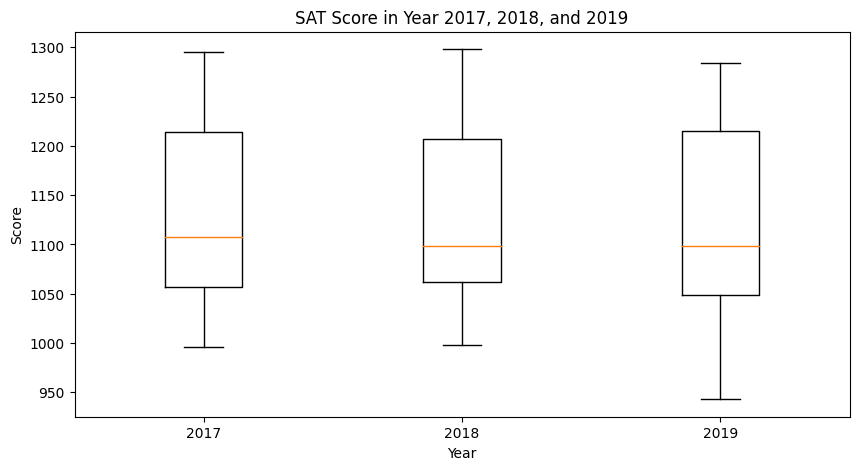

In [70]:
# Overview of SAT dataset

fig, ax1 = plt.subplots(figsize = (10,5))

ax1.boxplot([sat_2017["SAT_2017_Score"], sat_2018["SAT_2018_Score"], sat_2019["SAT_2019_Score"]])

ax1.set_xticklabels([2017, 2018, 2019])
ax1.set_xlabel("Year")
ax1.set_ylabel("Score")
ax1.set_title("SAT Score in Year 2017, 2018, and 2019");

**Observations:**
1. There is no significant changes in SAT highest & lowest score from 2017 to 2018
2. However, there is a slight drop in SAT score from 2018 to 2019.

In [71]:
# What is the highest score of each test every year?

sat_2017_max = sat_2017["SAT_2017_Score"].max()
sat_2018_max = sat_2018["SAT_2018_Score"].max()
sat_2019_max = sat_2019["SAT_2019_Score"].max()

print(f"The highest SAT score in 2017 is {sat_2017_max}")
print(f"The highest SAT score in 2018 is {sat_2018_max}")
print(f"The highest SAT score in 2019 is {sat_2019_max}")

The highest SAT score in 2017 is 1295
The highest SAT score in 2018 is 1298
The highest SAT score in 2019 is 1284


In [72]:
# Which state has the highest score?
display(sat_2017[sat_2017["SAT_2017_Score"] == 1295])
display(sat_2018[sat_2018["SAT_2018_Score"] == 1298])
display(sat_2019[sat_2019["SAT_2019_Score"] == 1284])

,State,SAT_2017_Participation,SAT_2017_Score
23,Minnesota,3.0,1295


,State,SAT_2018_Participation,SAT_2018_Score
23,Minnesota,4.0,1298


,State,SAT_2019_Participation,SAT_2019_Score
23,Minnesota,4.0,1284


**Observations:**
1. Minnesota have the highest SAT scores in 2017, 2018 and 2019
2. However, it is worth to note that Minnesota has less than 5% participation rate

In [73]:
# What is the lowest score of each test every year?

sat_2017_min = sat_2017["SAT_2017_Score"].min()
sat_2018_min = sat_2018["SAT_2018_Score"].min()
sat_2019_min = sat_2019["SAT_2019_Score"].min()

print(f"The lowest SAT score in 2017 is {sat_2017_min}")
print(f"The lowest SAT score in 2018 is {sat_2018_min}")
print(f"The lowest SAT score in 2019 is {sat_2019_min}")

The lowest SAT score in 2017 is 996
The lowest SAT score in 2018 is 998
The lowest SAT score in 2019 is 943


In [74]:
# Which state has the lowest score?
display(sat_2017[sat_2017["SAT_2017_Score"] == 996])
display(sat_2018[sat_2018["SAT_2018_Score"] == 998])
display(sat_2019[sat_2019["SAT_2019_Score"] == 943])

,State,SAT_2017_Participation,SAT_2017_Score
7,Delaware,100.0,996


,State,SAT_2018_Participation,SAT_2018_Score
7,Delaware,100.0,998


,State,SAT_2019_Participation,SAT_2019_Score
50,West Virginia,99.0,943


**Observations:**
1. Delaware has the lowest SAT score in 2017 and 2018
2. West Virginia has the lowest SAT score in 2019

**Manually calculate mean:**
- Write a function that takes in values and returns the mean of the values.
- Create a list of numbers that you test on your function to check to make sure your function works!

In [75]:
def calculate_mean(value):
    return sum(value)/len(value)

In [76]:
# test the mean function
list_num = [0,1,10,55,102]
calculate_mean(list_num)

33.6

In [77]:
#calculate mean
sat_2017_mean = calculate_mean(sat_2017['SAT_2017_Score'])
sat_2018_mean = calculate_mean(sat_2018['SAT_2018_Score'])
sat_2019_mean = calculate_mean(sat_2019['SAT_2019_Score'])

print(f"The average SAT score in 2017 is {sat_2017_mean}")
print(f"The average SAT score in 2018 is {sat_2018_mean}")
print(f"The average SAT score in 2019 is {sat_2019_mean}")

The average SAT score in 2017 is 1129.62
The average SAT score in 2018 is 1122.88
The average SAT score in 2019 is 1115.84


**Manually calculate standard deviation:**

The formula for standard deviation is below:

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

- Write a function that takes in values and returns the standard deviation of the values using the formula above.
- Use the function calculate the mean as defined earlier.
- Use the list of numbers you created above to test on your function.

In [78]:
def calculate_sd(value):
    discr = 0
    mean = calculate_mean(value)
    for num in value:
        discr += (num - mean)**2
    std_dev = (discr/len(value))**0.5
    return round(std_dev,2)

In [79]:
# Test standard deviation function
list_num = [0,1,10,55,102]
calculate_sd(list_num)

39.71

In [80]:
#calculate standard deviation using function defined earlier
sat_2017_sd = calculate_sd(sat_2017['SAT_2017_Score'])
sat_2018_sd = calculate_sd(sat_2018['SAT_2018_Score'])
sat_2019_sd = calculate_sd(sat_2019['SAT_2019_Score'])

print(f"The standard deviation SAT score in 2017 is {sat_2017_sd}")
print(f"The standard deviation SAT score in 2018 is {sat_2018_sd}")
print(f"The standard deviation SAT score in 2019 is {sat_2019_sd}")

The standard deviation SAT score in 2017 is 89.01
The standard deviation SAT score in 2018 is 91.91
The standard deviation SAT score in 2019 is 95.18


Use a **dictionary comprehension** to apply the standard deviation function created earlier to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value

In [81]:
# Calculate standard deviation of all the column in SAT datasets:

sd_sat = {key: calculate_sd(value) for key, value in sat.items() if sat[key].dtypes != object}

sd_sat

{'SAT_2017_Participation': 34.21,
 'SAT_2017_Score': 89.01,
 'SAT_2018_Participation': 36.72,
 'SAT_2018_Score': 91.91,
 'SAT_2019_Participation': 38.21,
 'SAT_2019_Score': 95.18}

### 1b. ACT DATASET

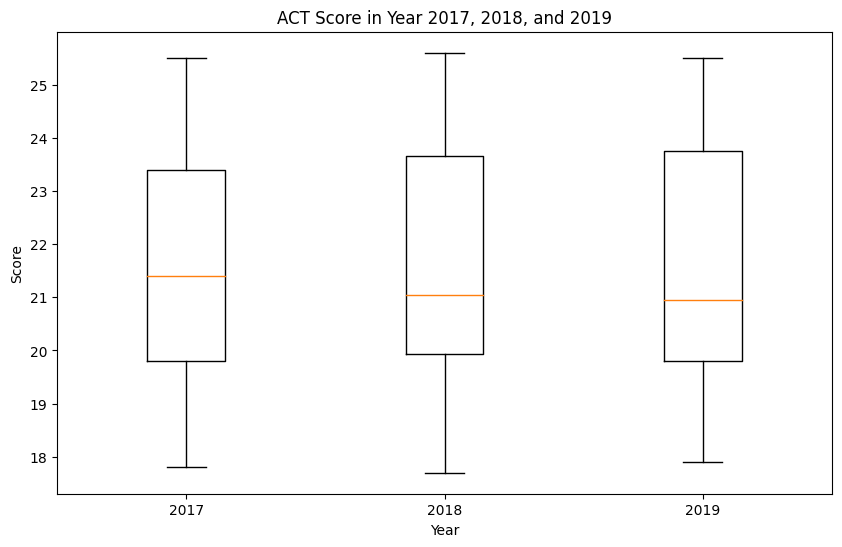

In [82]:
# Overview of ACT dataset

fig, ax2 = plt.subplots(figsize = (10,6))

ax2.boxplot([act_2017["ACT_2017_Score"], act_2018["ACT_2018_Score"], act_2019["ACT_2019_Score"]])

ax2.set_xticklabels([2017, 2018, 2019])
ax2.set_xlabel("Year")
ax2.set_ylabel("Score")
ax2.set_title("ACT Score in Year 2017, 2018, and 2019");

**Observations:**
1. There is no significant changes in ACT highest score over the years

In [83]:
# What is the highest score of each test every year?

act_2017_max = act_2017["ACT_2017_Score"].max()
act_2018_max = act_2018["ACT_2018_Score"].max()
act_2019_max = act_2019["ACT_2019_Score"].max()

print(f"The highest ACT score in 2017 is {act_2017_max}")
print(f"The highest ACT score in 2018 is {act_2018_max}")
print(f"The highest ACT score in 2019 is {act_2019_max}")

The highest ACT score in 2017 is 25.5
The highest ACT score in 2018 is 25.6
The highest ACT score in 2019 is 25.5


In [84]:
# Which state has the highest score?
display(act_2017[act_2017["ACT_2017_Score"] == 25.5])
display(act_2018[act_2018["ACT_2018_Score"] == 25.6])
display(act_2019[act_2019["ACT_2019_Score"] == 25.5])

,State,ACT_2017_Participation,ACT_2017_Score
30,New Hampshire,18.0,25.5


,State,ACT_2018_Participation,ACT_2018_Score
6,Connecticut,26.0,25.6


,State,ACT_2019_Participation,ACT_2019_Score
6,Connecticut,22.0,25.5
21,Massachusetts,21.0,25.5


**Observations:**
1. New Hampshire have the highest scores in 2017
2. Connecticut has the highest ACT scores consecutively in year 2018 and 2019
3. Massachusets ties with Connecticut for the highest ACT scores in year 2019

In [85]:
# What is the lowest score of each test every year?

act_2017_min = act_2017["ACT_2017_Score"].min()
act_2018_min = act_2018["ACT_2018_Score"].min()
act_2019_min = act_2019["ACT_2019_Score"].min()

print(f"The lowest ACT score in 2017 is {act_2017_min}")
print(f"The lowest ACT score in 2018 is {act_2018_min}")
print(f"The lowest ACT score in 2019 is {act_2019_min}")

The lowest ACT score in 2017 is 17.8
The lowest ACT score in 2018 is 17.7
The lowest ACT score in 2019 is 17.9


In [86]:
# Which state has the lowest score?
display(act_2017[act_2017["ACT_2017_Score"] == 17.8])
display(act_2018[act_2018["ACT_2018_Score"] == 17.7])
display(act_2019[act_2019["ACT_2019_Score"] == 17.9])

,State,ACT_2017_Participation,ACT_2017_Score
29,Nevada,100.0,17.8


,State,ACT_2018_Participation,ACT_2018_Score
29,Nevada,100.0,17.7


,State,ACT_2019_Participation,ACT_2019_Score
28,Nevada,100.0,17.9


**Observations:**
1. Nevada has the lowest ACT score for 3 consecutive years

In [87]:
# Average score of each test every year using calculate_mean function defined earlier

act_2017_mean = round(calculate_mean(act_2017['ACT_2017_Score']),2)
act_2018_mean = round(calculate_mean(act_2018['ACT_2018_Score']),2)
act_2019_mean = round(calculate_mean(act_2019['ACT_2019_Score']),2)

print(f"The average ACT score in 2017 is {act_2017_mean}")
print(f"The average ACT score in 2018 is {act_2018_mean}")
print(f"The average ACT score in 2019 is {act_2019_mean}")

The average ACT score in 2017 is 21.47
The average ACT score in 2018 is 21.45
The average ACT score in 2019 is 21.42


In [88]:
# Standard deviation score of each test every year using calculate_sd function defined earlier

act_2017_sd = round(calculate_sd(act_2017['ACT_2017_Score']),2)
act_2018_sd = round(calculate_sd(act_2018['ACT_2018_Score']),2)
act_2019_sd = round(calculate_sd(act_2019['ACT_2019_Score']),2)

print(f"The standard deviation of ACT score in 2017 is {act_2017_sd}")
print(f"The standard deviation of ACT score in 2018 is {act_2018_sd}")
print(f"The standard deviation of ACT score in 2019 is {act_2019_sd}")

The standard deviation of ACT score in 2017 is 1.98
The standard deviation of ACT score in 2018 is 2.09
The standard deviation of ACT score in 2019 is 2.18


In [89]:
# Calculate standard deviation of all the column in ACT datasets:

sd_act = {key: calculate_sd(value) for key, value in act.items() if act[key].dtypes != object}

sd_act

{'ACT_2017_Participation': 31.79,
 'ACT_2017_Score': 1.98,
 'ACT_2018_Participation': 33.77,
 'ACT_2018_Score': 2.09,
 'ACT_2019_Participation': 34.31,
 'ACT_2019_Score': 2.18}

### 1c. SAT vs ACT Scores

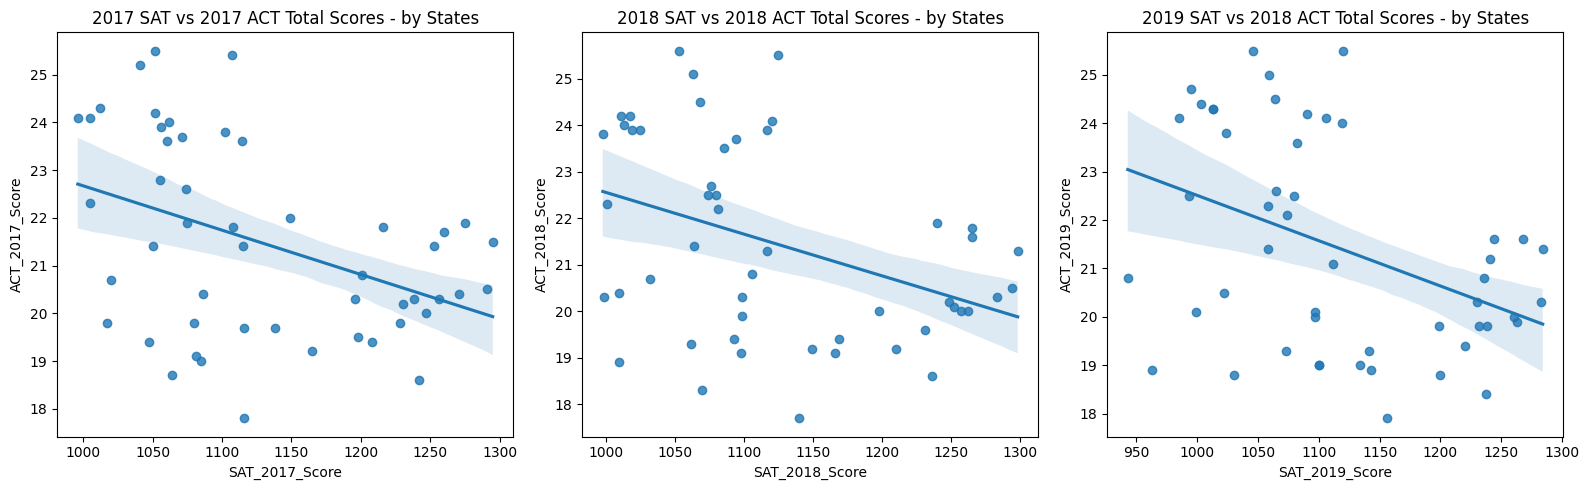

In [90]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(16,5))

sns.regplot(data = sat_act, x = "SAT_2017_Score", y = "ACT_2017_Score", ax = ax[0])
ax[0].set_title("2017 SAT vs 2017 ACT Total Scores - by States")

sns.regplot(data = sat_act, x = "SAT_2018_Score", y = "ACT_2018_Score", ax = ax[1])
ax[1].set_title("2018 SAT vs 2018 ACT Total Scores - by States")


sns.regplot(data = sat_act, x = "SAT_2019_Score", y = "ACT_2019_Score", ax = ax[2])
ax[2].set_title("2019 SAT vs 2018 ACT Total Scores - by States")

plt.tight_layout()

**Observations:**
- Generally, ACT and SAT scores are negatively correlated to each other.
- This suggest that states tend to focus on one test over the other. Meaning that states with lower SAT scores tend to have higher ACT scores, and vice versa.

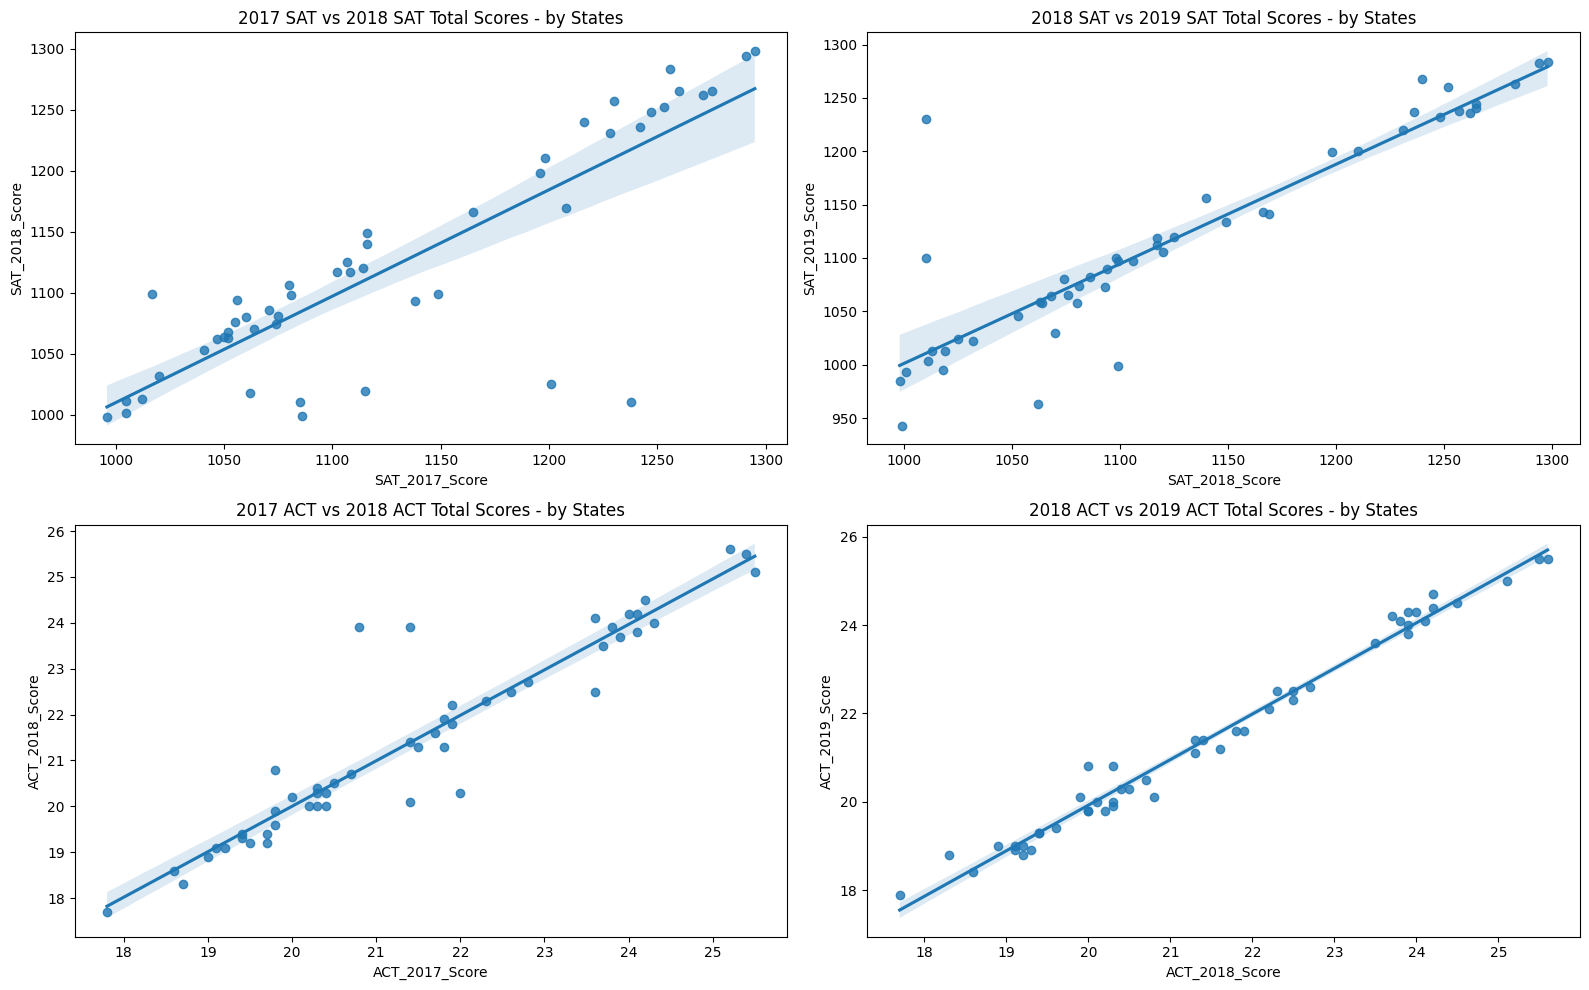

In [91]:
fig, ax= plt.subplots(nrows = 2, ncols = 2, figsize=(16,10))

sns.regplot(data = sat_act, x = "SAT_2017_Score", y = "SAT_2018_Score", ax = ax[0][0])
ax[0][0].set_title("2017 SAT vs 2018 SAT Total Scores - by States")

sns.regplot(data = sat_act, x = "SAT_2018_Score", y = "SAT_2019_Score", ax = ax[0][1])
ax[0][1].set_title("2018 SAT vs 2019 SAT Total Scores - by States")

sns.regplot(data = sat_act, x = "ACT_2017_Score", y = "ACT_2018_Score", ax = ax[1][0])
ax[1][0].set_title("2017 ACT vs 2018 ACT Total Scores - by States")

sns.regplot(data = sat_act, x = "ACT_2018_Score", y = "ACT_2019_Score", ax = ax[1][1])
ax[1][1].set_title("2018 ACT vs 2019 ACT Total Scores - by States")

plt.tight_layout();

**Observations:**
- ACT and SAT results per year has a very strong correlation. The states that did well last year are likely to do well next year. This correlation is much stronger for ACT tests as compared to SAT tests.

## 2. SAT & ACT Participation Rate Trends

### 2a. SAT DATASET

In [92]:
# What are the average participation rate of each test every year?

sat_2017_part_mean = sat_2017["SAT_2017_Participation"].mean()
sat_2018_part_mean = sat_2018["SAT_2018_Participation"].mean()
sat_2019_part_mean = sat_2019["SAT_2019_Participation"].mean()

print(f"The participation rate of SAT test in 2017 is {sat_2017_part_mean}")
print(f"The participation rate of SAT test in 2018 is {sat_2018_part_mean}")
print(f"The participation rate of SAT test in 2019 is {sat_2019_part_mean}")

The participation rate of SAT test in 2017 is 38.6
The participation rate of SAT test in 2018 is 44.82
The participation rate of SAT test in 2019 is 48.16


**Observations:** There's a 10% increase in SAT Participation Rate from 2017 to 2019

### 2b. ACT DATASET

In [93]:
# What are the average participation rate of each test every year?

act_2017_part_mean = act_2017["ACT_2017_Participation"].mean()
act_2018_part_mean = act_2018["ACT_2018_Participation"].mean()
act_2019_part_mean = act_2019["ACT_2019_Participation"].mean()

print(f"The participation rate of ACT test in 2017 is {act_2017_part_mean}")
print(f"The participation rate of ACT test in 2018 is {act_2018_part_mean}")
print(f"The participation rate of ACT test in 2019 is {act_2019_part_mean}")

The participation rate of ACT test in 2017 is 65.92
The participation rate of ACT test in 2018 is 62.32
The participation rate of ACT test in 2019 is 59.2


**Observations:** There's a 6% drop in ACT Participation Rate from 2017 to 2019

### 2c. SAT vs ACT Participation

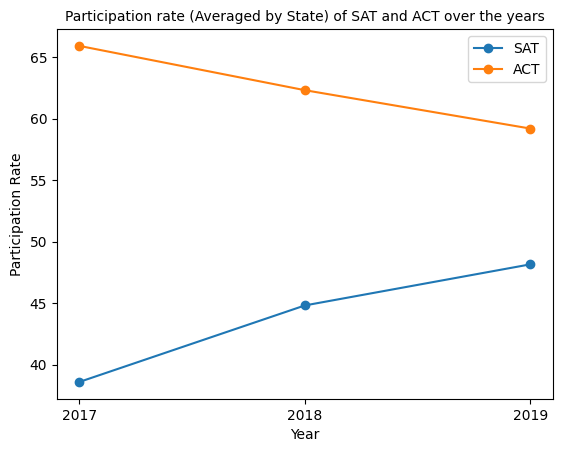

In [94]:
# Plot the participation rate of SAT and ACT

year = [2017, 2018, 2019]
y_sat = [sat_2017_part_mean, sat_2018_part_mean, sat_2019_part_mean]
y_act = [act_2017_part_mean, act_2018_part_mean, act_2019_part_mean]

plt.plot(year, y_sat, label = "SAT", marker = 'o')
plt.plot(year, y_act, label = "ACT", marker = 'o')

plt.title("Participation rate (Averaged by State) of SAT and ACT over the years", fontsize = 10)
plt.ylabel("Participation Rate")
plt.xlabel("Year")
plt.legend()
plt.xticks(year);

**Observations:**
1. There are increase in participation rate of SAT test over the years
2. There are decrease in participation rate of ACT test over the years

In [95]:
display(sat_2017[sat_2017["SAT_2017_Participation"] == 100])
display(sat_2018[sat_2018["SAT_2018_Participation"] == 100])
display(sat_2019[sat_2019["SAT_2019_Participation"] == 100])
display(act_2017[act_2017["ACT_2017_Participation"] == 100])
display(act_2018[act_2018["ACT_2018_Participation"] == 100])
display(act_2019[act_2019["ACT_2019_Participation"] == 100])

,State,SAT_2017_Participation,SAT_2017_Score
6,Connecticut,100.0,1041
7,Delaware,100.0,996
22,Michigan,100.0,1005


,State,SAT_2018_Participation,SAT_2018_Score
5,Colorado,100.0,1025
6,Connecticut,100.0,1053
7,Delaware,100.0,998
12,Idaho,100.0,1001
22,Michigan,100.0,1011


,State,SAT_2019_Participation,SAT_2019_Score
5,Colorado,100.0,1024
6,Connecticut,100.0,1046
7,Delaware,100.0,985
9,Florida,100.0,999
12,Idaho,100.0,993
13,Illinois,100.0,1013
22,Michigan,100.0,1003
40,Rhode Island,100.0,995


,State,ACT_2017_Participation,ACT_2017_Score
1,Alabama,100.0,19.2
4,Arkansas,100.0,19.4
6,Colorado,100.0,20.8
18,Kentucky,100.0,20.0
19,Louisiana,100.0,19.5
24,Minnesota,100.0,21.5
25,Mississippi,100.0,18.6
26,Missouri,100.0,20.4
27,Montana,100.0,20.3
29,Nevada,100.0,17.8


,State,ACT_2018_Participation,ACT_2018_Score
0,Alabama,100.0,19.1
3,Arkansas,100.0,19.4
17,Kentucky,100.0,20.2
18,Louisiana,100.0,19.2
25,Mississippi,100.0,18.6
26,Missouri,100.0,20.0
27,Montana,100.0,20.0
28,Nebraska,100.0,20.1
29,Nevada,100.0,17.7
34,North Carolina,100.0,19.1


,State,ACT_2019_Participation,ACT_2019_Score
0,Alabama,100.0,18.9
3,Arkansas,100.0,19.3
17,Kentucky,100.0,19.8
18,Louisiana,100.0,18.8
24,Mississippi,100.0,18.4
26,Montana,100.0,19.8
27,Nebraska,100.0,20.0
28,Nevada,100.0,17.9
33,North Carolina,100.0,19.0
35,Ohio,100.0,20.0


**Observations:**
1. There are only 3 states in 2017, 5 states in 2018, and 7 states in 2019, that has 100% participation rate.
2. In contrast to SAT tests, there are 17 states that made ACT tests compulsory in 2017. But only 15 states has 100% participation rate in 2019.

In [96]:
sat["SAT_2017_2018"] = abs(sat["SAT_2017_Participation"] - sat["SAT_2018_Participation"])
sat["SAT_2018_2019"] = abs(sat["SAT_2018_Participation"] - sat["SAT_2019_Participation"])

display(sat[["State", "SAT_2017_Participation", "SAT_2018_Participation", "SAT_2017_2018"]].sort_values("SAT_2017_2018", ascending = False).head())
display(sat[["State", "SAT_2018_Participation", "SAT_2019_Participation", "SAT_2018_2019"]].sort_values("SAT_2018_2019", ascending = False).head())

,State,SAT_2017_Participation,SAT_2018_Participation,SAT_2017_2018
12,Illinois,9.0,99.0,90.0
5,Colorado,11.0,100.0,89.0
8,Florida,83.0,56.0,27.0
38,Rhode Island,71.0,97.0,26.0
47,West Virginia,14.0,28.0,14.0


,State,SAT_2018_Participation,SAT_2019_Participation,SAT_2018_2019
47,West Virginia,28.0,99.0,71.0
8,Florida,56.0,100.0,44.0
35,Oklahoma,8.0,22.0,14.0
39,South Carolina,55.0,68.0,13.0
19,Maryland,76.0,82.0,6.0


**Observations:**
1. Illinois had a massive jump in their SAT participation rate from 9% to 99% in 2018 (90% increments)
2. Colorado had a massive jump in their SAT participation rate from 11% to 100% in 2018 (89% increments)
3. West Virginia had a jump in their SAT participation rate from 28% to 99% in 2019 (71% increments)

In [97]:
act["ACT_2017_2018"] = abs(act["ACT_2017_Participation"] - act["ACT_2018_Participation"])
act["ACT_2018_2019"] = abs(act["ACT_2018_Participation"] - act["ACT_2019_Participation"])

display(act[["State", "ACT_2017_Participation", "ACT_2018_Participation", "ACT_2017_2018"]].sort_values("ACT_2017_2018", ascending = False).head())
display(act[["State", "ACT_2018_Participation", "ACT_2019_Participation", "ACT_2018_2019"]].sort_values("ACT_2018_2019", ascending = False).head())

,State,ACT_2017_Participation,ACT_2018_Participation,ACT_2017_2018
5,Colorado,100.0,30.0,70.0
12,Illinois,93.0,43.0,50.0
1,Alaska,65.0,33.0,32.0
34,Ohio,75.0,100.0,25.0
26,Nebraska,84.0,100.0,16.0


,State,ACT_2018_Participation,ACT_2019_Participation,ACT_2018_2019
39,South Carolina,100.0,78.0,22.0
24,Missouri,100.0,82.0,18.0
47,West Virginia,65.0,49.0,16.0
8,Florida,66.0,54.0,12.0
10,Hawaii,89.0,80.0,9.0


**Observations:**
1. Colorado had a massive drop in ACT participation rate from 100% to 30% in 2018 (70% decrement)
2. Illinois had a massive drop in ACT participation rate from 930% to 40% in 2018 (50% decrement). This can be linked to the massive jump in SAT participation rate from 9% to 99% in 2018 (90% increments)
3. South Carolina had a drop in ACT participation rate from 100% to 78% in 2019 (22% decrement)
4. Missouri had a drop in ACT participation rate from 100% to 78% in 2019 (22% decrement)

## 3. SAT & ACT Scores vs Participation Rate Correlation Analysis

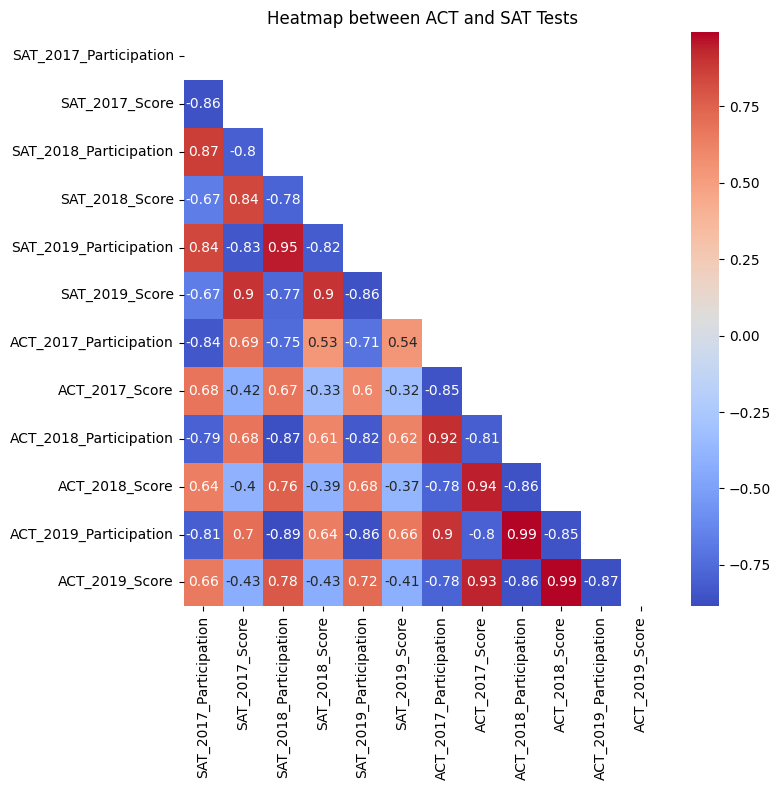

In [98]:
# Use Seaborn Heatmap to visualize correlations between SAT and ACT datas

mask = np.zeros(sat_act.corr().shape, dtype = bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8))
plt.title('Heatmap between ACT and SAT Tests', fontsize=12)
sns.heatmap(sat_act.corr(), cmap='coolwarm', annot=True, mask = mask)

plt.tight_layout();

**Observations:**
- SAT participation rates has a strong negative correlation with SAT scores.
- Similar to SAT, ACT participation rates also has a strong negative correlation with ACT scores.
- This means that the states with higher SAT/ACT participation tend to have lower SAT scores, and vice versa.
- It is plausible that in states where SAT/ACT are compulsory, all the participants are required to take the test whether or not they are going to college / university. If students are not planning to go to college / university, they will tend to spend less time in preparation, hence the lower score.
- In states that does not make SAT/ACT compulsory, only those that planned to enter college / university will take the tests. Hence, those taking the tests are motivated to do well, and will put in efforts to study and score higher in their exams.

## 4. SAT/ACT Scores vs Student Success

Should college admission board require applicants to take SAT/ACT tests? Are they still relevant in determining student success?

### 4.1 SAT / ACT vs Retention Rate

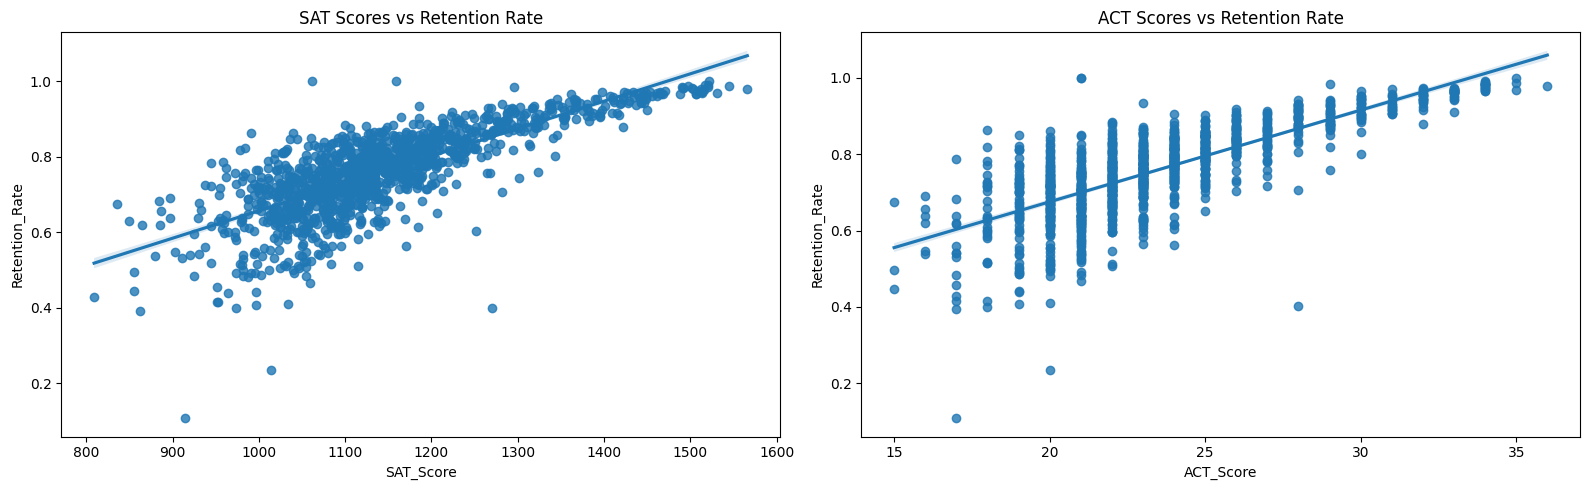

In [99]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16,5))

sns.regplot(data = data1819, x = 'SAT_Score', y = 'Retention_Rate', ax = ax[0])
ax[0].set_title("SAT Scores vs Retention Rate")


sns.regplot(data = data1819, x = 'ACT_Score', y = 'Retention_Rate', ax = ax[1])
ax[1].set_title("ACT Scores vs Retention Rate")

plt.tight_layout();

**Observations:**
There appears to be a positive correlation between higher SAT / ACT with retention rate

### 4.2 SAT / ACT vs Completion Rate

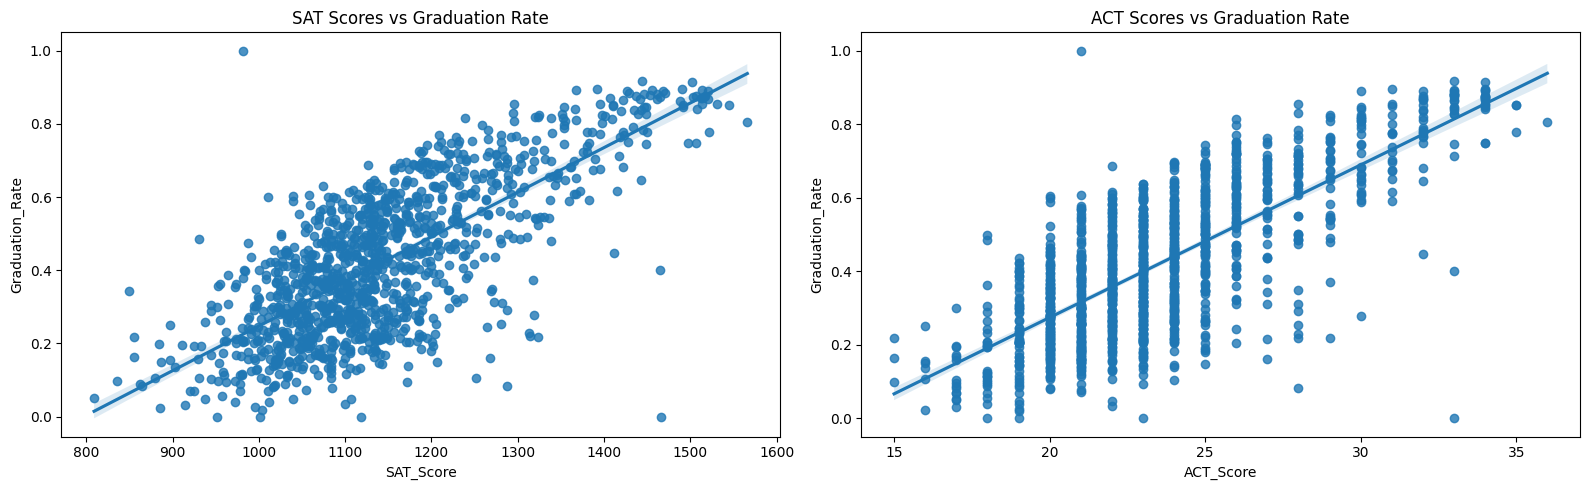

In [100]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16,5))

sns.regplot(data = data1819, x = 'SAT_Score', y = 'Graduation_Rate', ax = ax[0])
ax[0].set_title("SAT Scores vs Graduation Rate")


sns.regplot(data = data1819, x = 'ACT_Score', y = 'Graduation_Rate', ax = ax[1])
ax[1].set_title("ACT Scores vs Graduation Rate")

plt.tight_layout();

**Observations:**
There appears to be a positive correlation between higher SAT / ACT with likelihood of graduation

### 4.3 SAT / ACT vs Average Earning After Graduation

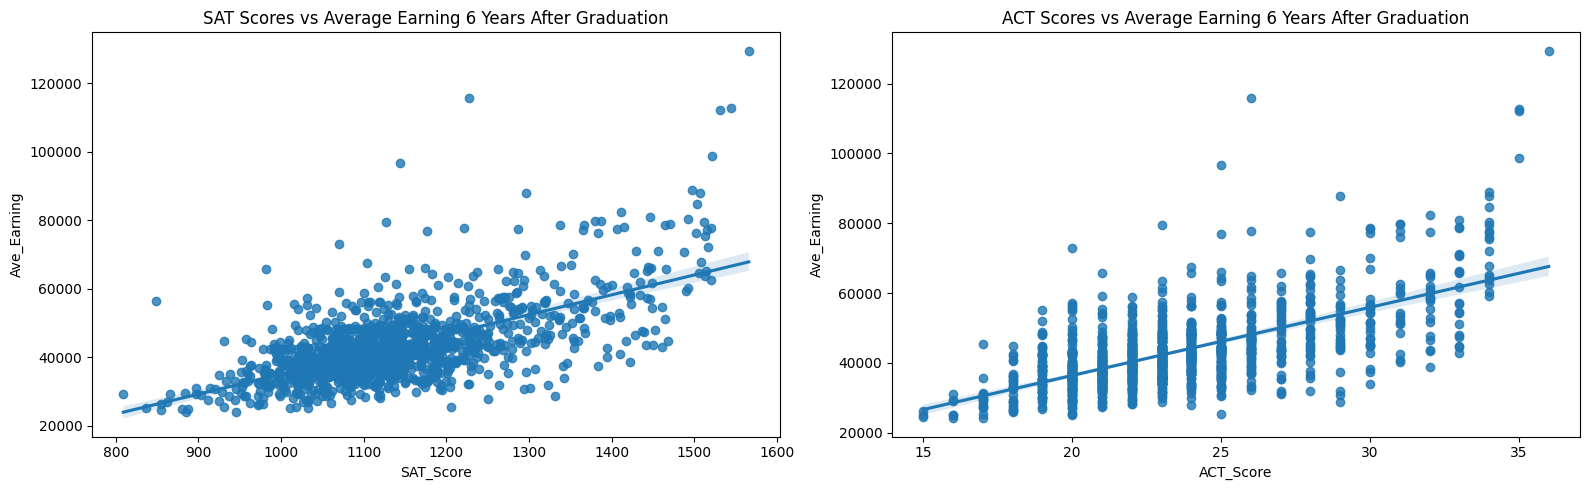

In [101]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16,5))

sns.regplot(data = data1819, x = 'SAT_Score', y = 'Ave_Earning', ax = ax[0])
ax[0].set_title("SAT Scores vs Average Earning 6 Years After Graduation")

sns.regplot(data = data1819, x = 'ACT_Score', y = 'Ave_Earning', ax = ax[1])
ax[1].set_title("ACT Scores vs Average Earning 6 Years After Graduation")

plt.tight_layout();

**Observations:**
There appears to be a positive correlation between higher SAT / ACT with likelihood of average earning 6 Years After Graduation

### 4.4 SAT/ACT Scores vs Student Success Correlation Analysis

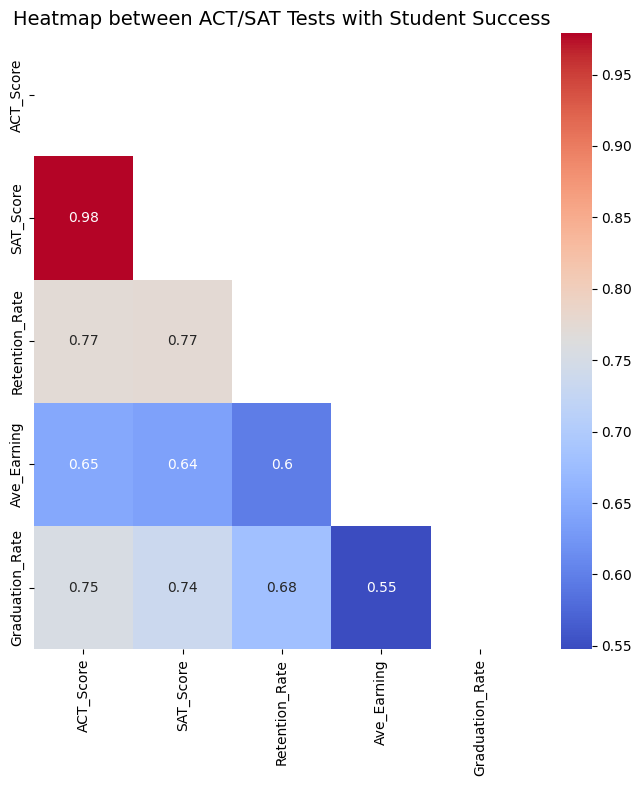

In [102]:
# Use Seaborn Heatmap to visualize correlations between SAT and ACT datas

mask = np.zeros(data1819.corr().shape, dtype = bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8))
plt.title('Heatmap between ACT/SAT Tests with Student Success', fontsize=14)
sns.heatmap(data1819.corr(), cmap='coolwarm', annot=True, mask = mask);

**Observations:**
As shown in the previous graph, there are strong correlations for:
1. SAT_Score vs Graduation Rate (0.74) & ACT_Score vs Graduation Rate (0.75)
2. SAT_Score vs Average Earning (0.64) & ACT_Score vs Graduation Rate (0.65)
3. SAT_Score vs Retention Rate (0.77) & ACT_Score vs Retention Rate (0.77)

# CONCLUSION & RECOMMENDATIONS

**Trends in SAT and ACT participation and scores for the years 2017-2019.**

From 2017-2019 SAT and ACT datasets, it can be inferred that:
1. Generally, there is no significant changes in ACT and SAT minimum scores, maximum scores, and average scores, with the exception of a slight drop in minimum & maximum SAT score from 2018 to 2019.
2. ACT and SAT scores are negatively correlated to each other. Meaning that states with lower SAT scores tend to have higher ACT scores, and vice versa.
3. ACT and SAT results every year has a very strong correlation. The states that did well last year are likely to do well next year. This correlation is much stronger for ACT tests as compared to SAT tests.
4. There are increase in participation rate of SAT test and decrease in participation rate of ACT test over the years.
5. SAT & ACT participation rates has a strong negative correlation with scores. This means that the states with higher SAT/ACT participation tend to have lower SAT scores, and vice versa. It is plausible that in states where SAT/ACT are compulsory, all the participants are required to take the test whether or not they are going to college / university. If students are not planning to go to college / university, they will tend to spend less time in preparation, hence the lower score. Whereas in states that does not make SAT/ACT compulsory, only those that planned to enter college / university will take the tests. Hence, those taking the tests are motivated to do well, and will put in efforts to study and score higher in their exams.

**SAT/ACT scores as accurate indicators of student success**

As there are changes of trends in SAT and ACT participations, are SAT / ACT are still relevant in current day & age?

From 2018-2019 College Enrollment datasets, it can be inferred that students with higher SAT/ACT scores:
1. Have a higher chance of completing their freshman year and progress to their sophomore year
1. Are more likely to complete their courses and graduate
3. Tends to be more successful, measuring from the income level 6 years post graduation

**Recommendations**

Although there are a huge demand in making standardized tests as optional, it is undeniable that there are strong correlations between SAT & ACT scores and student success. Hence, **college admission board shall continue to make standardized test compulsory** during their admission process.

**Further Studies**

The recommended further studies to be done are as follows:
1. Current analysis are done using 2017 to 2019 datasets. To analyze 2020 and 2021 datasets to get a more accurate representation of current SAT & ACT Tests
2. Current analysis measures income level 6 years post graduations. A lot of factors might affect income in 6 years, hence, it is recommended to get the income level 1 year post graduation to get a better measurement of student success.
3. To consider more factors in measuring student success, such as: College / University GPA, Academic Achievements (Awards), etc.